In [232]:
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

## Error functions

In [233]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

## Make Franke function and plot

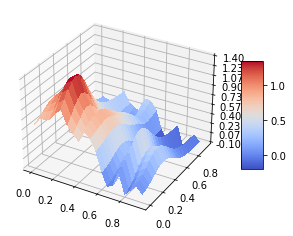

In [240]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = 0.2*np.random.randn(len(x))
    return term1 + term2 + term3 + term4 + noise


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Make design matrix with polynomial degree n

In [241]:
def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of columns in beta
	X = np.ones((N,l)) # matrix with N rows, l columns

	for i in range(1,n+1): # 1-6
		q = int((i)*(i+1)/2) # 1 3 6 10 15 21
		for k in range(i+1): # 0-1, 0-2, 0-3,...
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

## OLS regression with polynomial degree 1-5

In [242]:
# Making meshgrid of datapoints and compute Franke's function
n = 10
N = 200
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x_mesh, y_mesh = np.meshgrid(x,y)
x_flat = np.ravel(x_mesh)
y_flat = np.ravel(y_mesh)
z = FrankeFunction(x_flat, y_flat)
polydegree = np.zeros(n)
mse_errors = np.zeros(n)
r2_train = np.zeros(n)
r2_test = np.zeros(n)
mse_train = np.zeros(n)
mse_test = np.zeros(n)
variances = np.zeros(n)

# OLS regression for polynomials from 1 to 5
for i in range(n):
    n = i+1
    polydegree[i] = n
    X = create_X(x_flat, y_flat, n)
    X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
    
    # scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # prediction
    betaOLS = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ z_train
    ztilde_train = X_train_scaled @ betaOLS
    ztilde_test = X_test_scaled @ betaOLS
    
    # errors
    r2_train[i] = r2_score(z_train, ztilde_train)
    r2_test[i] = r2_score(z_test, ztilde_test)
    mse_train[i] = mean_squared_error(z_train,ztilde_train) #MSE(z_train,ztilde_ols_train)
    mse_test[i] = mean_squared_error(z_test,ztilde_test)  #MSE(z_test,ztilde_ols_test)

[ 0.00000000e+00  4.90369830e+00  2.73640328e+00 -4.21286150e+01
 -4.77098291e+01 -3.33185188e+01  1.24044101e+02  3.54209840e+02
  3.17477693e+02  2.20196889e+02  1.17397930e+02 -1.39767090e+03
 -1.24653439e+03 -1.36567406e+03 -7.52944022e+02 -1.82114620e+03
  3.06539309e+03  3.35580911e+03  2.97142594e+03  3.70005017e+03
  1.21515951e+03  5.37988655e+03 -3.84582575e+03 -5.81391679e+03
 -4.51500161e+03 -5.09708515e+03 -6.38705798e+03 -4.12543082e+02
 -8.05997906e+03  2.70033630e+03  5.83769799e+03  5.66890204e+03
  3.82225661e+03  6.05710724e+03  6.99230452e+03 -1.53535779e+03
  6.72785330e+03 -8.00942888e+02 -3.44874192e+03 -4.20907775e+03
 -2.78738862e+03 -2.31879678e+03 -4.56941166e+03 -4.68622159e+03
  2.42966193e+03 -2.97037735e+03 -1.83689493e+02  1.41880350e+03
  1.04844966e+03  2.00149892e+03  2.59144319e+02  1.10708484e+03
  1.91431276e+03  1.75019930e+03 -1.46145062e+03  5.39288531e+02
  1.54220457e+02 -3.91687901e+02  1.78118466e+02 -6.94442295e+02
  5.67746351e+01 -9.30206

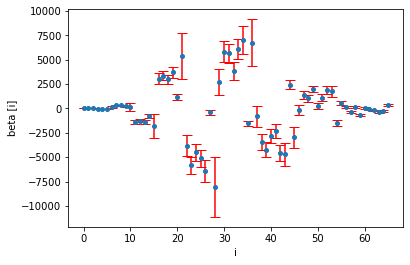

,Beta,+-
0,0.000000,0.000000
1,4.903698,0.635288
2,2.736403,0.665127
3,-42.128615,10.069263
4,-47.709829,6.570835
...,...,...
61,-93.020629,74.908251
62,-207.728455,74.118402
63,-346.389903,85.970508
64,-277.464175,111.599372


In [237]:
sigma2 = np.zeros(len(betaOLS))
for i in range(len(betaOLS)):
    sigma2[i] = 2*np.sqrt(np.linalg.pinv(X_train_scaled.T @ X_train_scaled)[i,i] * 0.1**2)#/np.sqrt(N)
print(betaOLS)


pd.DataFrame(betaOLS, sigma2)
#plt.scatter(np.arange(0,len(betaOLS)), betaOLS, color='blue')
#plt.scatter(np.arange(0,len(betaOLS)), betaOLS+sigma2, color='red', s=5)
#plt.scatter(np.arange(0,len(betaOLS)), betaOLS-sigma2, color='red', s=5)
plt.errorbar(np.arange(0,len(betaOLS)), betaOLS, yerr=sigma2, fmt='o', ecolor='red', capsize=5, markersize=4)
plt.xlabel('i')
plt.ylabel('beta [i]')
plt.show()

table = pd.DataFrame({'Beta': betaOLS, '+-': sigma2})
table

## Plot errors as function of complexity

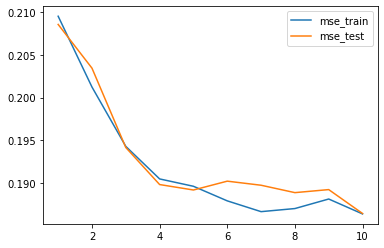

In [243]:
plt.plot(polydegree, mse_train, label='mse_train')
plt.plot(polydegree, mse_test, label='mse_test')
#plt.plot(polydegree, r2_train, label='r2_train')
#plt.plot(polydegree, r2_test, label='r2_test')
plt.legend()
plt.show()

## Discussion on bias-variance trade-off

With polynomial degree from 1 to 5, there is no significant difference between the mse train and test errors.
- Må få prøvd med høyere grad av polynom

## OLS regression

In [239]:
ztilde_ols_train = X_train_scaled @ beta_ols
ztilde_ols_test = X_test_scaled @ beta_ols

print('R2 OLS train: %.10f' %(R2(z_train,ztilde_ols_train)))
print('R2 OLS test: %.10f' %(R2(z_test,ztilde_ols_test)))
print('mse OLS train: %.10f' %(MSE(z_train,ztilde_ols_train)))
print('mse OLS test: %.10f' %(MSE(z_test,ztilde_ols_test)))
print(beta_ols)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 21 is different from 66)